In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [2]:
!pwd 

/aiffel/aiffel


In [3]:
img_bgr = cv2.imread('/aiffel/aiffel/yeomsoungwon.jpg')
img_bgr = cv2.resize(img_bgr, (640, 640))
img_show = img_bgr.copy()

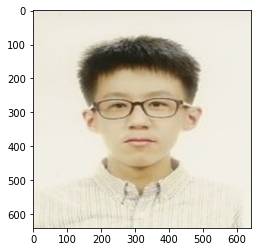

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출 face detection

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(171, 201) (438, 468)]]


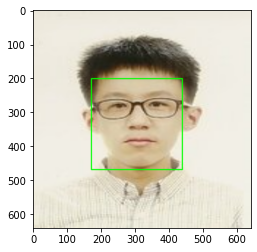

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크 face landmark

In [10]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat' 
landmark_predictor = dlib.shape_predictor(model_path)

# import os
# model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat' 
# landmark_predictor = dlib.shape_predictor(model_path)

In [11]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


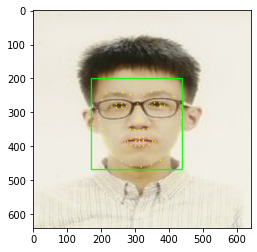

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

In [13]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[48][1] - landmark[2][1])*2
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(310, 327)
(x,y): (310,327)
(w,h):(158,76)


In [19]:
import os 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print(img_sticker.shape)

(76, 158, 3)


In [20]:
refined_x = x-w//2
refined_y = y-h//2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

(x,y):(231, 289)


In [21]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print('(x_shape,y_shape) : (%d,%d)'%(x_shape, y_shape))

sticker_area = img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

(x_shape,y_shape) : (76,158)


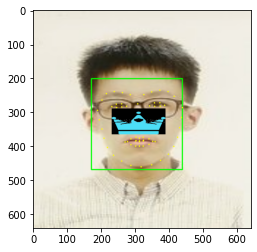

In [22]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

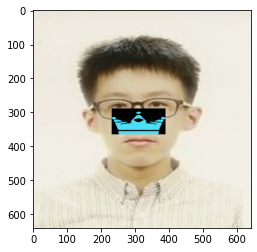

In [23]:
sticker_area = img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Going Deeper_CR2 2. 카메라 스티커앱 만들기 첫걸음 PROJECT
# 회고의 프로젝트를 위한 링크 = https://github.com/PEBpung/Aiffel/blob/master/Project/Exploration/E10.%20%EA%B3%A0%EC%96%91%EC%9D%B4%20%EC%88%98%EC%97%BC%20%EC%8A%A4%ED%8B%B0%EC%BB%A4%20%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb 
# import os
# model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# landmark_predictor = dlib.shape_predictor(model_path)
# -> os.getenv('HOME')+ = 절대경로 라는 것을 알게 되는 하루였습니다.